# Analyzing supernova data

### Explore the file

In [1]:
%matplotlib inline
import numpy as np
from astropy.io import fits
import matplotlib
from matplotlib import rcParams
from matplotlib import pyplot as plt

rcParams['figure.figsize'] = (10.0, 8.0)

In [2]:
from astropy.cosmology import FlatLambdaCDM
from astropy import units as u

In [4]:
# open the file
with fits.open("data/sndata.fits") as hdulist:
    sne = np.asarray(hdulist[2].data)

In [5]:
type(sne)

numpy.ndarray

In [6]:
len(sne)

277

In [7]:
sne.dtype.names

('SNLS',
 'z',
 'mb.S2',
 'e_mb.S2',
 'x1.S2',
 'e_x1.S2',
 'c.S2',
 'e_c.S2',
 'cov(mb,x1)S2',
 'cov(mb,c)S2',
 'cov(x1,c)S2',
 'mb.Si',
 'e_mb.Si',
 's.Si',
 'e_s.Si',
 'c.Si',
 'e_c.Si',
 'cov(mb,s)Si',
 'cov(mb,c)Si',
 'cov(s,c)Si')

In [8]:
# get table columns we care about
z = sne["z"].astype(np.float64)
mb = sne["mb.S2"].astype(np.float64)
mb_err = sne["e_mb.S2"].astype(np.float64)
c = sne["c.S2"].astype(np.float64)
x1 = sne["x1.S2"].astype(np.float64)

In [9]:
def plot_sn_data(z, mb, mb_err, cosmo=None):
    plt.errorbar(z, mb, yerr=mb_err, ls='none', color='0.2', marker='o', ms=1.)
    if cosmo is not None:
        zarr = np.linspace(0.05, 1.2, 200)
        mb_predict = cosmo.distmod(zarr).value - 19.3
        plt.plot(zarr, mb_predict, c="r")
    plt.xlabel("redshift")
    plt.ylabel("mB")

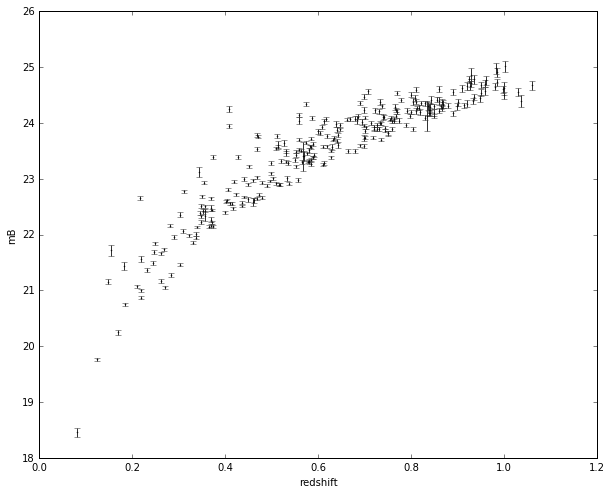

In [10]:
plot_sn_data(z, mb, mb_err)

In [11]:
# correct mb
mb_corr = mb - 2.3 * c + 0.128 * x1

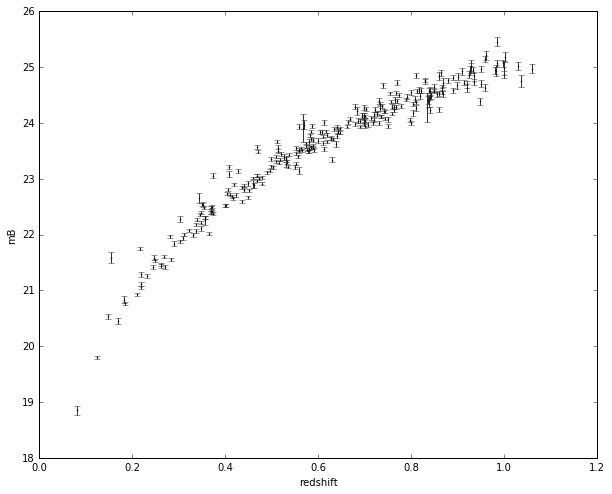

In [12]:
plot_sn_data(z, mb_corr, mb_err)

In [13]:
cosmo = FlatLambdaCDM(H0=70., Om0=0.25)

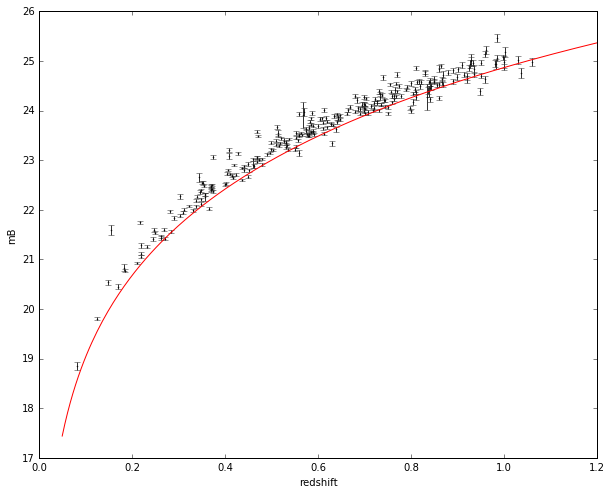

In [14]:
plot_sn_data(z, mb_corr, mb_err, cosmo=cosmo)